# United States Election 2016

## Summary:

This notebook analyzes data from the US Elections 2016 to provide insights on candidate's popularity, tweeting patterns, most common topics, and predict tweet success.

## Dataset:

The data has around 3K tweets from each candidate: Donald Trump and Hillary Clinton, for a total of 6K+ tweets. For each tweet, the dataset contains its text, date, number of retweets, number of times it was marked as favorite, and some other metadata.

## Index

#### 0) Install and load packages

#### 1) Load the data

#### 2) Word cloud of tweets for each candidate

#### 3) Basic statistics from tweets

#### 4) Predicting tweet success

## 0) Install/load required packages

In [ ]:
# Install packages (only if they have not been priorly installed)
install.packages("zoo")
install.packages("earth")
install.packages("https://cran.r-project.org/src/contrib/Archive/slam/slam_0.1-33.tar.gz", type="source", repos=NULL)
install.packages("tm")

In [ ]:
# Load packages
library(tm)
library(zoo)
library(earth)

## 1) Load the data

In [8]:
download.file("https://github.com/olarayej/spark/raw/master/tweets.csv", "tweets.csv")

In [9]:
twitterData <- read.csv("tweets.csv")

In [10]:
# Filter Hillary's vs Trump's tweets
hillaryTweets <- twitterData[twitterData$handle == "HillaryClinton", ]
trumpTweets <- twitterData[twitterData$handle == "realDonaldTrump",]

## 2) Word cloud of tweets

In [ ]:
# NOTE: this requires R 3.3.1. It is not working on the DSX notebook 
# as package wordcloud can't be installed on R 3.3.0. I have attached
# the resulting images.

# Create a function to plot a word cloud given a column
createWordCloud <- function(column) {
  corpus <- Corpus(VectorSource(column))
  corpus <- tm_map(corpus, PlainTextDocument)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeWords, stopwords('english'))
  corpus <- tm_map(corpus, stemDocument)
  wordcloud(corpus, max.words = 100, random.order = FALSE)
}

# Plot word clouds for both candidates
createWordCloud(hillaryTweets$text)
createWordCloud(trumpTweets$text)

## Trump's tweets
![title](https://github.com/olarayej/spark/raw/master/Trump%20tweeets.png)

## Clinton's tweets
![title](https://github.com/olarayej/spark/raw/master/Hillary_Tweets.png)

## 3) Basic statistics from tweets
 

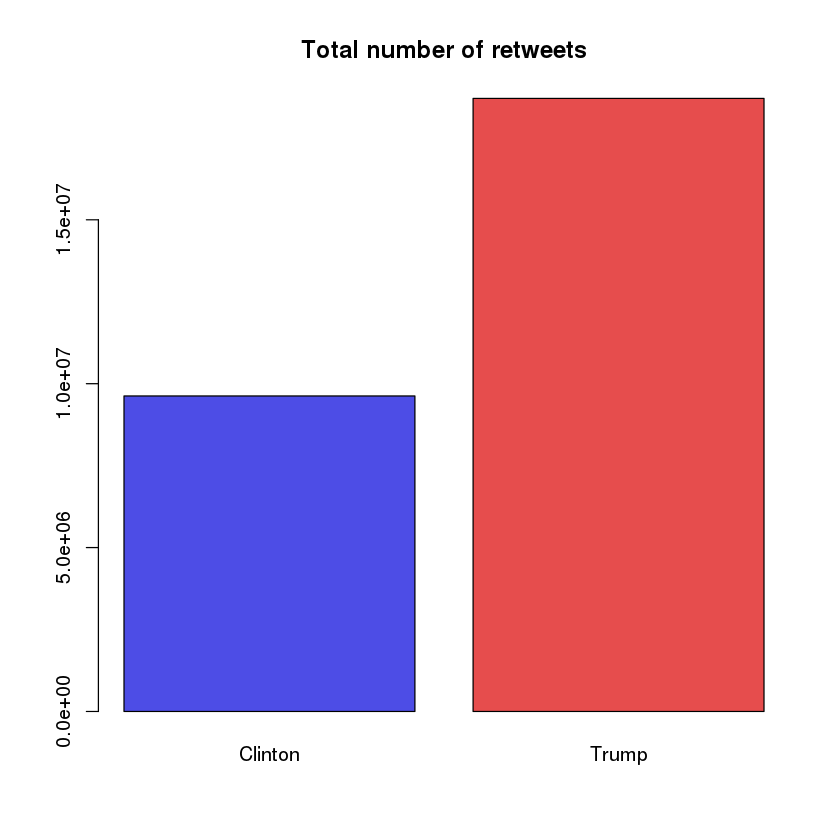

In [11]:
# Total number of retweets for each candidate
barplot(c(sum(hillaryTweets$retweet_count), sum(trumpTweets$retweet_count)), 
        names.arg=c("Clinton", "Trump"),
        main = "Total number of retweets",
        col = c(rgb(0.3,0.3,0.9), rgb(0.9, 0.3, 0.3)))

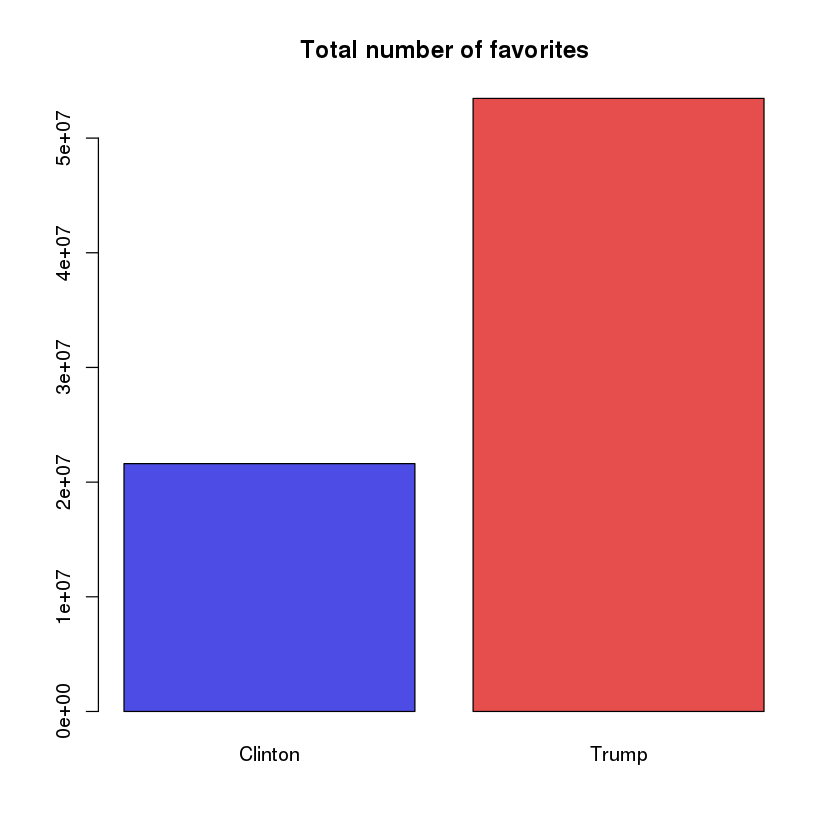

In [12]:
# Total number of favorites for each candidate
barplot(c(sum(hillaryTweets$favorite_count), 
        sum(trumpTweets$favorite_count)), 
        names.arg=c("Clinton", "Trump"), 
        main = "Total number of favorites",
        col = c(rgb(0.3,0.3,0.9), rgb(0.9, 0.3, 0.3)))



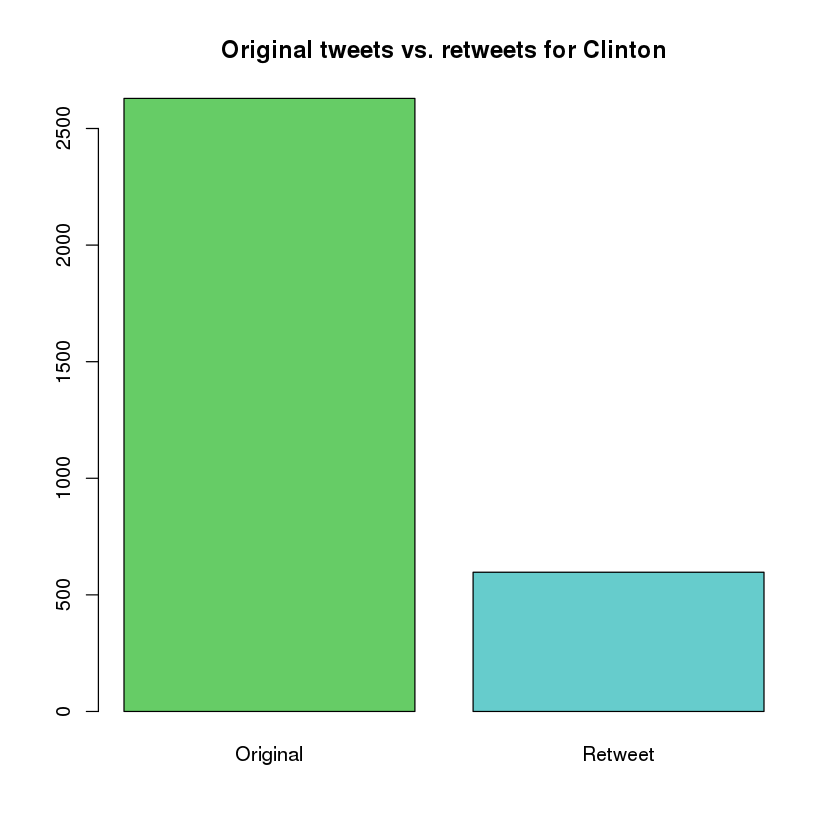

In [13]:
# Number of original tweets vs. retweets
barplot(c(nrow(hillaryTweets[hillaryTweets$is_retweet == "False", ]), 
          nrow(hillaryTweets[hillaryTweets$is_retweet == "True", ])), 
        names.arg=c("Original", "Retweet"), 
        main = "Original tweets vs. retweets for Clinton",
        col = c(rgb(0.4,0.8,0.4), rgb(0.4, 0.8, 0.8)))


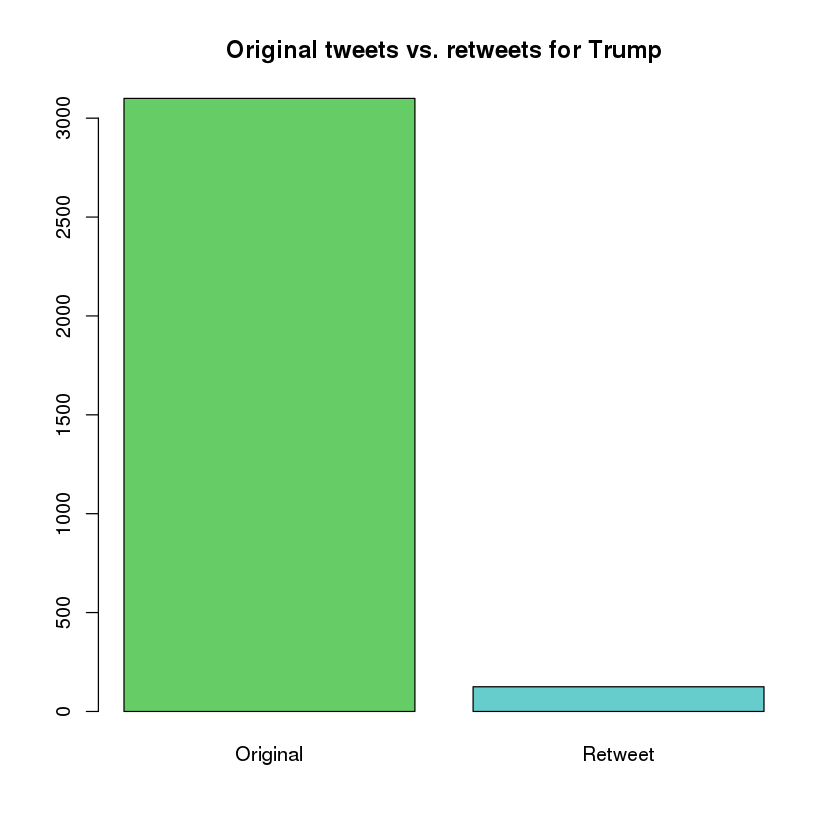

In [14]:
# Number of original tweets vs. retweets
barplot(c(nrow(hillaryTweets[trumpTweets$is_retweet == "False", ]), nrow(trumpTweets[trumpTweets$is_retweet == "True", ])), 
        names.arg=c("Original", "Retweet"), main = "Original tweets vs. retweets for Trump",
        col = c(rgb(0.4,0.8,0.4), rgb(0.4, 0.8, 0.8)))

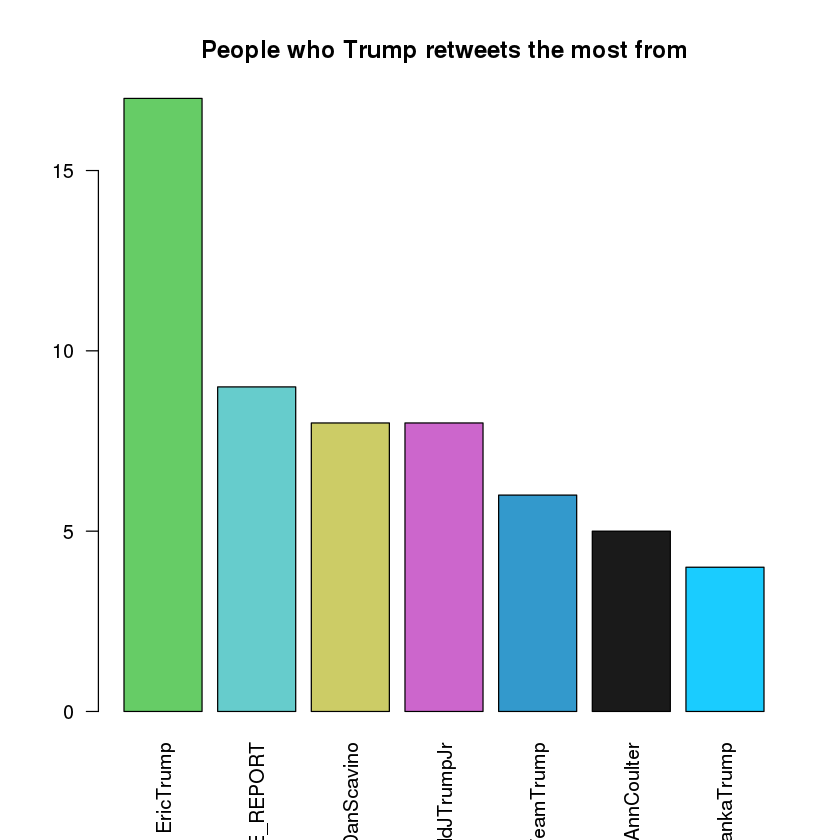

In [15]:
barplot(head(sort(table(trumpTweets$original_author), decreasing = T), 8)[-1], las=2, 
        main = "People who Trump retweets the most from",
        col = c(rgb(0.4,0.8,0.4), rgb(0.4, 0.8, 0.8), rgb(0.8, 0.8, 0.4), rgb(0.8, 0.4, 0.8), rgb(0.2, 0.6, 0.8), rgb(0.1, 0.1, 0.1), rgb(0.1, 0.8, 1)))

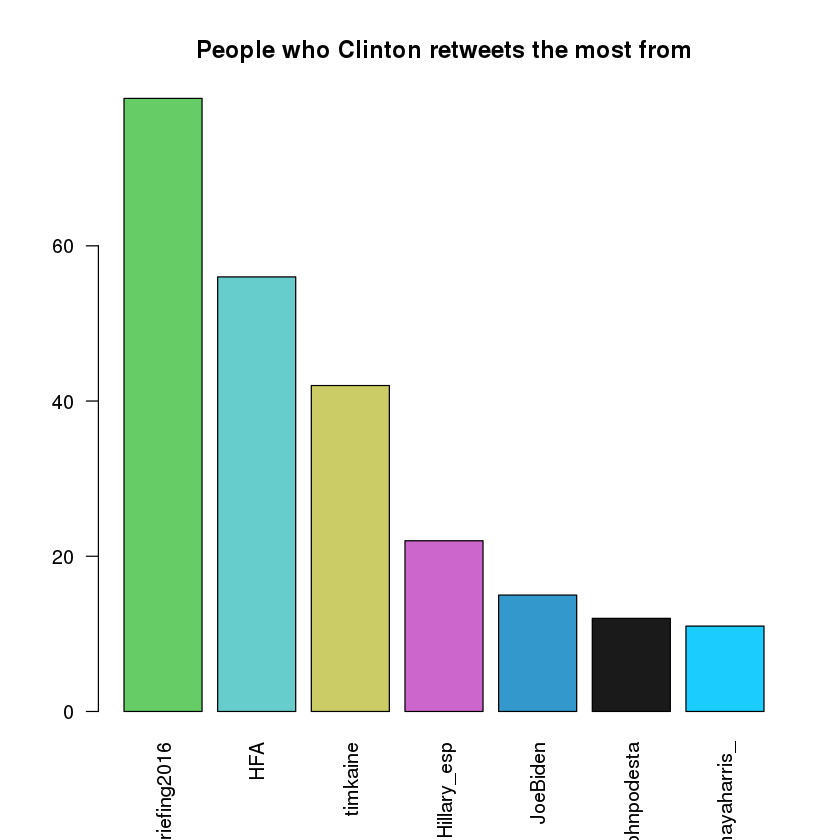

In [16]:
barplot(head(sort(table(hillaryTweets$original_author), decreasing = T), 8)[-1], las=2, main = "People who Clinton retweets the most from",
       col = c(rgb(0.4,0.8,0.4), rgb(0.4, 0.8, 0.8), rgb(0.8, 0.8, 0.4), rgb(0.8, 0.4, 0.8), rgb(0.2, 0.6, 0.8), rgb(0.1, 0.1, 0.1), rgb(0.1, 0.8, 1)))


In [17]:
# Format dates
hillaryTweets$date <- as.Date(hillaryTweets$time, "%Y-%m-%d")
trumpTweets$date <- as.Date(trumpTweets$time, "%Y-%m-%d")


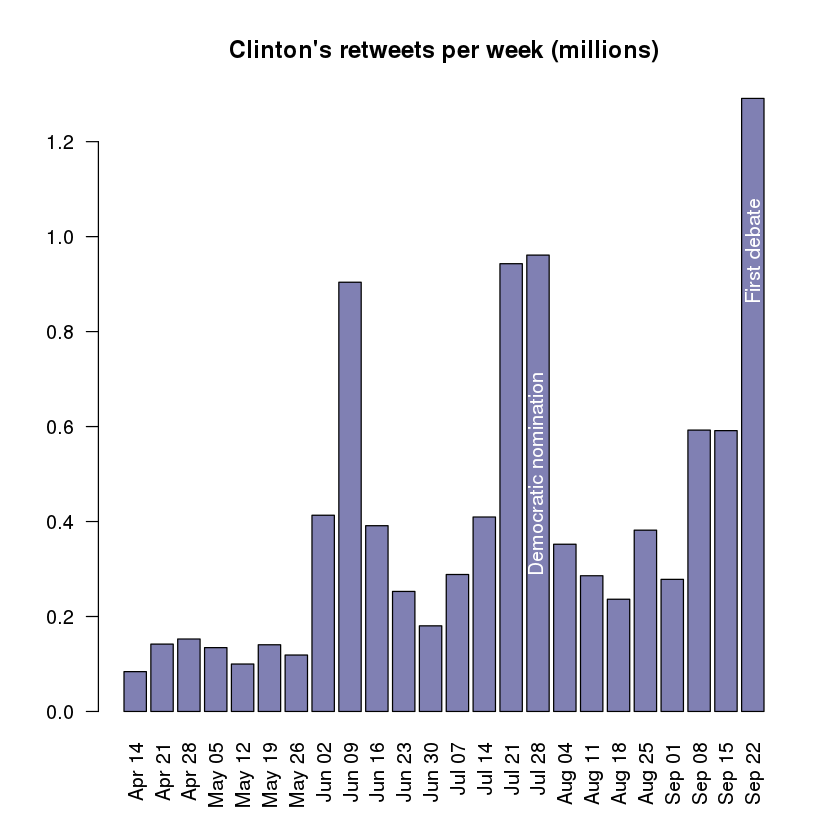

In [18]:
hillaryRetweetsByWeek <- aggregate(retweet_count ~ as.integer(as.numeric(date) / 7), data = hillaryTweets, sum)
barplot(c(hillaryRetweetsByWeek[, 2] / 1000000),
        names=format(as.Date(hillaryRetweetsByWeek[, 1] * 7), "%b %d"), 
        las=2, main = "Clinton's retweets per week (millions)",
        col=rgb(.5, .5, .7))

text(18.6, 0.5, "Democratic nomination", srt=90, col=rgb(1,1,1))
text(28.3, .970000, "First debate", srt=90, col=rgb(1,1,1))

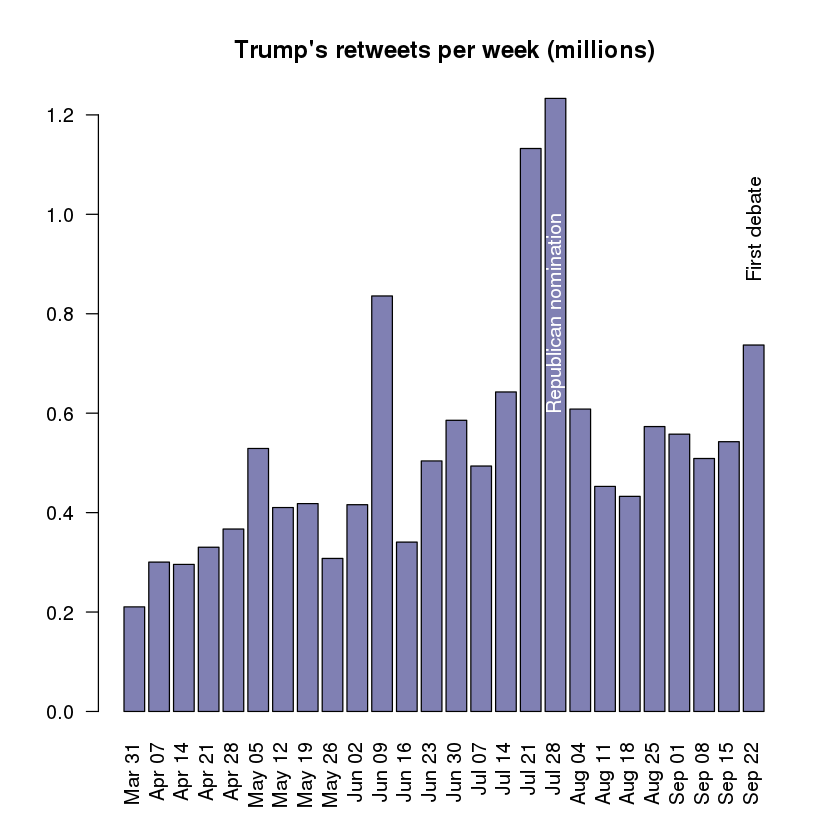

In [19]:
# Retweets by week for Donald Trump. If this fail, check pakage zoo is loaded
trumpRetweetsByWeek <- aggregate(retweet_count ~ as.integer(as.numeric(date) / 7), data = trumpTweets[trumpTweets$date > "2016-04-01", ], sum)
barplot(c(trumpRetweetsByWeek[, 2]/1000000), 
        names=format(as.Date(trumpRetweetsByWeek[, 1] * 7), "%b %d"), 
        las=2, main = "Trump's retweets per week (millions)", 
        col=rgb(.5, .5, .7))
text(21.1, 0.8, "Republican nomination", srt=90, col=rgb(1,1,1))
text(30.7, .970000, "First debate", srt=90)


In [20]:
# Most viral Trump's tweets
head(trumpTweets[order(-trumpTweets$retweet_count), c("text", "retweet_count", "favorite_count")])


,text,retweet_count,favorite_count
3612,"How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted? https://t.co/gECLNtQizQ",167274,294162
2531,The media is spending more time doing a forensic analysis of Melania's speech than the FBI spent on Hillary's emails.,120817,247883
4465,Happy #CincoDeMayo! The best taco bowls are made in Trump Tower Grill. I love Hispanics! https://t.co/ufoTeQd8yA https://t.co/k01Mc6CuDI,82653,115107
2555,Such a great honor to be the Republican Nominee for President of the United States. I will work hard and never let you down! AMERICA FIRST!,41461,129198
2974,FBI director said Crooked Hillary compromised our national security. No charges. Wow! #RiggedSystem,40507,78550
2687,I am pleased to announce that I have chosen Governor Mike Pence as my Vice Presidential running mate. News conference tomorrow at 11:00 A.M.,39064,92237


In [21]:
# Most viral Clinton's tweets
head(hillaryTweets[order(-hillaryTweets$retweet_count), c("text", "retweet_count", "favorite_count")])


,text,retweet_count,favorite_count
3617,Delete your account. https://t.co/Oa92sncRQY,490180,660384
136,"""I never said that."" —Donald Trump, who said that. #debatenight https://t.co/6T8qV2HCbL",91670,134808
82,RT this if you're proud to be standing with Hillary tonight. #debatenight https://t.co/91tBmKxVMs,80169,80678
1856,"Great speech. She's tested. She's ready. She never quits. That's why Hillary should be our next @POTUS. (She'll get the Twitter handle, too)",63628,190992
3345,"Gun violence requires more than moments of silence. It requires action. In failing that test, the Senate failed the American people.",62341,113861
74,"Donald Trump called her ""Miss Piggy"" and ""Miss Housekeeping."" Her name is Alicia Machado. #DebateNight https://t.co/0wrISjJe6z",57182,74103


### 4) Predict tweet success

What is success? We will define success as a measure of the number of times a tweet is retweeted.

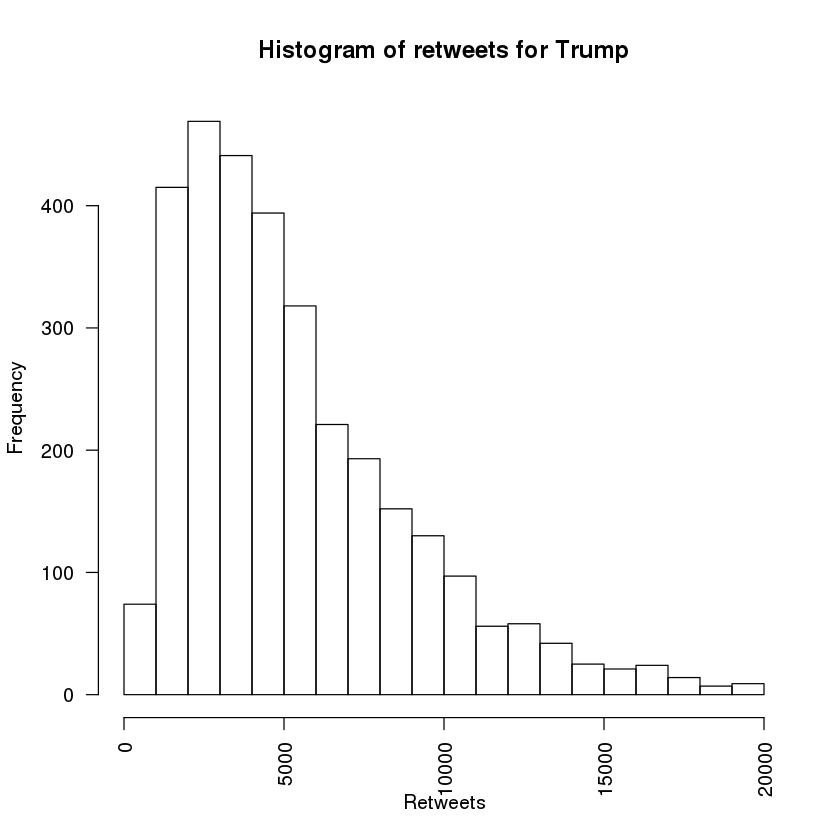

In [22]:
# Histogram of retweets for Trump
hist(trumpTweets$retweet_count[trumpTweets$retweet_count < 20000], 
    main="Histogram of retweets for Trump", 
    breaks=20, las=2, 
    axes = T, 
    xlab = "Retweets")


In [23]:
mean(trumpTweets$retweet_count)

[1] 5812.217

### Feature extraction
Features are extracted using TF/IDF algorithm (term frequency-inverse document frequency). Punctuation and stop words are removed beforehand.

In [36]:
# Create a function to extract features using Term-Frequency
createFeatures <- function(column) {
  corpus <- Corpus(VectorSource(column))
  corpus <- tm_map(corpus, PlainTextDocument)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeWords, stopwords('english'))
  # Note: the following line was removed because of incompatibility with R 3.3.0.
  # If using R 3.3.1, the line below should be uncommented
  # corpus <- tm_map(corpus, stemDocument)
  DocumentTermMatrix(corpus, control = list(weighting = weightTfIdf))
}


In [37]:
# Create features
featuresTrump <- createFeatures(trumpTweets$text)


In [38]:
dataTrump <- as.data.frame(as.matrix(featuresTrump))

### Regression model

In [47]:
# Variable to be predicted will be the number of retweets
dataTrump$label <- trumpTweets$retweet_count

In [48]:
# Normalize features
normalize <- function(data) {
  as.data.frame(sapply(data[,-5], function(x) {x / max(x)}))
}

dataTrump <- normalize(dataTrump)

In [ ]:
# Build a regression model: Multivariate Adaptive Regression Splines
mars <- earth(label ~ ., dataTrump, pmethod="none")

In [49]:
# Show the model. Note R Square value is around 0.75
mars

Selected 131 of 131 terms, and 99 of 7633 predictors (pmethod="none")
Termination condition: Reached nk 201
Importance: `823`, forensic, hillary, bowls, realdonaldtrump, ...
Number of terms at each degree of interaction: 1 130 (additive model)
GCV 0.000361001    RSS 0.9809007    GRSq 0.71163    RSq 0.7563589

### Make predictions

In [ ]:
max(trumpTweets$retweet_count)

In [52]:
newTweets <- c("How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted?",
               "I love crocodiles",
               "I will defeat Isis",
               "I will defeat Isis I will defeat Isis I will defeat Isis I will defeat Isis I will defeat Isis",
               "will take trump realdonaldtrump hillari",
               "I will make America great again",
               "I like Hillary Clinton",
               "I hate Hillary Clinton",
               "Climate change is a hoax, and a very expensive one!",
               "Climate change is real. We must act to save the planet.",
               "College education should be free for everyone!")

newDataPoint <- head(as.data.frame(as.matrix(createFeatures(c(newTweets, as.character(trumpTweets$text))))), length(newTweets))
preds <- predict(mars, newDataPoint)
df <- data.frame("Predicted retweets"=floor(preds[, 1]*167274), "Text"=newTweets)[, c(2,1)]


In [54]:
# Show predicted number of retweets for each new tweet
df

Text,Predicted.retweets
"How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted?",161019
I love crocodiles,4781
I will defeat Isis,14465
I will defeat Isis I will defeat Isis I will defeat Isis I will defeat Isis I will defeat Isis,14465
will take trump realdonaldtrump hillari,615
I will make America great again,19101
I like Hillary Clinton,11581
I hate Hillary Clinton,11581
"Climate change is a hoax, and a very expensive one!",39724
Climate change is real. We must act to save the planet.,3922
